# Redes Neuronales

### Información del curso:
- **Nombre del curso**: Introducción al aprendizaje automático
- **Profesor**: Dr. Jesús Emmanuel Solís Pérez
- **Email**: jsolisp@unam.mx
- **Semestre**: 2025-1
- **Fecha**: Diciembre 09, 2024
- **Enlace del curso**: [https://jesolisp.github.io/Curso-Introduccion-Aprendizaje-Automatico](https://jesolisp.github.io/Curso-Introduccion-Aprendizaje-Automatico/docs/home.html)

---

### Información del Notebook:
- **Título del Notebook**: Redes Neuronales
- **Versión**: 1.0
- **Última modificación**: November 17, 2024
- **Descripción**: Este cuaderno tiene como finalidad dar a conocer las aplicaciones y tipos de aprendizaje automático.

---

### Instrucciones:
1. **Orden de ejecución de celdas**: Ejecute las celdas en el orden presentado para garantizar que las dependencias se manejen adecuadamente.
2. **Envío**: Guarde y envíe este cuaderno como un archivo `.ipynb` antes de la fecha de vencimiento.
3. **Comentarios y documentación**: asegúrese de agregar comentarios y documentación adecuados a su código.

---

### Licencia:
- Este cuaderno se proporciona únicamente con fines educativos. Todos los derechos reservados © 2024 ENES Juriquilla.

---

## Perceptrón.

Como se ha visto en el capítulo 1, la predicción por un modelo lineal está dada por la siguiente expresión

$$
 \hat{y} = \beta_{0} + \beta_{1}\cdot x_{1} + \beta_{2}\cdot x_{2} + \cdots + \beta_{p}\cdot x_{p},
$$
donde $\hat{y}$ es una suma ponderada de las características de entrada $x_{1}$ hasta $x_{p}$, ponderada por los coeficientes $\beta_{0}$ a $\beta_{p}$. Podemos visualizar esto como sigue

```{figure} images/perceptron.png
 ---
 height: 280px
 width: 440px
 name: fig:perceptron
 ---
 Visualización del modelo de regresión, donde las entradas y las predicciones se muestran como nodos y los coeficientes son conexiones entre los nodos.
```

Aquí, cada nodo de la izquierda representa una entrada, las líneas de conexión los coeficientes encontrados y el nodo de la derecha la salida, que es una suma ponderada de las entradas.

## Perceptrón multicapa

Este tipo de redes involucra una capa de entrada, una capa de salida y *capas ocultas* entre las capas de entrada y salida. En estos modelos se asume que la información viaja de izquierda a derecha y por esta razón reciben este nombre. Además, este tipo de representaciones matemáticas son suficientemente complejas para aproximar funciones suaves arbitrarias.

Asuma que se tienen $n\in \mathbb{N}$ nodos de entrada que corresponden a las cantidades de entrada $x_{1},\dots,x_{n}$, con $H \in \mathbb{N}$ nodos ocultos y $m \in \mathbb{N}$ nodos de salida que corresponden a las cantidades de salida $y_{1},\dots,y_{m}$, si se multiplica cada entrada con una constante y se realiza la suma de todas las entradas y se agrega una constante se obtiene la siguiente expresión

$$
 \sum_{k=1}^{n} w_{ik;h1}x_{k} + b_{h1},
$$ (eq:linear-kernel)

donde los llamados *pesos* $w_{ik;h_{1}}$ representan el coeficiente real utilizado por el nodo oculto para multiplicar a la $k$-ésima entrada ($ik$) mientras que los sesgos o "bias" $b_{h_{1}}$ son sumados por el nodo oculto.

Para evitar que la expresión {eq}`eq:linear-kernel` sea considerada como una forma compleja de un modelo de regresión lineal múltiple es necesario que en el nodo oculto exista una función real no lineal  llamada *función de activación*

$$
 \varphi_{h} \left( \sum_{k=1}^{n} w_{ik;h1}x_{k} + b_{h1} \right).
$$ (eq:single-ann)

La función de activación más utilizada es la función logística 

$$
 \varphi(\xi) = \frac{e^{\xi}}{1 + e^{\xi}},
$$ (eq:logistic-function)

donde el estado de los nodos ocultos $l=1,\dots,H$ después del procesamiento de las entradas se puede representar como sigue

$$
 \varphi_{h} \left( \sum_{k=1}^{n} w_{ik;hl} \cdot x_{k} + b_{hl} \right), \quad l=1,\dots,H.
$$ (eq:single-ann-n)

Asumiendo que la capa de salida procesa esta entrada de la misma manera que la capa oculta utilizando diferentes coeficientes y una función no lineal diferente, es posible obtener una salida a partir de 

$$
 y_{j} = \varphi_{o}\left( b_{oj} + \sum_{k=1}^{n} w_{ik,oj} \cdot x_{k} + \sum_{l=1}^{H} w_{hl,oj} \cdot \varphi_{h} \left( \sum_{k=1}^{n} w_{ik;hl} \cdot x_{k} + b_{hl} \right) \right), \quad j=1,\dots,m.
$$

## Gradiente descendente

El método del gradiente descendente es un algoritmo iterativo basado en derivada que permite encontrar valores óptimos a partir de minimizar una función costo. En este caso, nuestro objetivo es 

$$
 \underset{w,b}{\min\left\{ J\right\}}.
$$

Considerando que nuestro modelo de regresión logístico está dado por la siguiente ecuación

$$
 \hat{y}(z) = \frac{1}{1 + \exp(-z)},
$$


donde $z = w^{T}X + b$, podemos calcular la verosimilitud logarítmica de los parámetros $w$ y $b$ utilizando la función *Binary Coss-Entropy Loss* o *Log Loss*

$$
 J\left( w,b \right) = \frac{1}{m} \sum_{k=1}^{m}L \left( \hat{y}_{k}, y_{k} \right) = -\frac{1}{m} \sum_{k=1}^{m}\left[ y_{k} \log(\hat{y}_{k})  + (1 - \hat{y}_{k})\log(1-\hat{y}_{k}) \right].
$$

Aquí, $J\left( w,b \right)$ es el costo general y $L$ es el costo del $k$-ésimo elemento.

Aplicando el método de Gradiente Descendente (GD), los parámetros son actualizados en cada iteración a partir de las siguientes ecuaciones

$$
 \begin{aligned}
  w_{k+1} &= w_{k} - \lambda \cdot \frac{\partial J\left( w,b \right)}{\partial w}, \\
  b_{k+1} &= b_{k} - \lambda \cdot \frac{\partial J\left( w,b \right)}{\partial b},
 \end{aligned}
$$

donde $\lambda$ denota la tasa de aprendizaje.

## Obtención de los parámetros

Para obtener $\partial J\left( w,b \right)$ es necesario aplicar la regla de la cadena como sigue

$$
 \frac{\partial J}{\partial w} = \frac{\partial J}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial z}{\partial w},
$$

$$
 \frac{\partial J}{\partial b} = \frac{\partial J}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial z}{\partial b}.
$$

Calculando las siguientes derivadas parciales tenemos

$$
 \frac{\partial z}{\partial w} = \frac{\partial }{\partial w} \left( w^{T}X + b \right) = X,
$$

$$
 \frac{\partial z}{\partial b} = \frac{\partial }{\partial b} \left( w^{T}X + b \right) = 1.
$$

Para $ {\partial \hat{y}}/{\partial z}$, tenemos

$$
 \frac{\partial \hat{y}}{\partial z} = \frac{\partial}{\partial z} \left( \frac{1}{1 + \exp(-z)} \right) = \hat{y}\left(1 - \hat{y} \right).
$$

Utilizando la derivada de un cociente de dos funciones

$$
 \frac{\mathrm{d}}{\mathrm{d}t} \left( \frac{u}{v} \right) = \frac{uv' + u'v}{v^{2}}.
$$

y definiendo $u := 1$ y $v := 1 + \exp(-z)$, tenemos

$$
 \begin{aligned}
  \frac{\partial}{\partial z}\left( \frac{1}{1 + \exp(-z)} \right) &= \frac{(1 + \exp(-z))(0) - (1)(-\exp(-z))}{(1 + \exp(-z))^{2}} = \frac{\exp(-z)}{(1 + \exp(-z))^{2}} = \frac{1-1+\exp(-z)}{(1 + \exp(-z))^{2}}, \\
   & = \frac{1+\exp(-z)}{(1 + \exp(-z))^{2}} - \frac{1}{(1 + \exp(-z))^{2}} = \frac{1}{1 + \exp(-z)} - \frac{1}{(1 + \exp(-z))^{2}}, \\
   & = \frac{1}{1 + \exp(-z)} \left[ 1 - \frac{1}{1 + \exp(-z)} \right] = \hat{y}(1 - \hat{y}).
 \end{aligned}
$$

Para $\partial J/\partial \hat{y}$

$$
 \begin{aligned}
  \frac{\partial J}{\partial \hat{y}} = -\frac{1}{m}\frac{\partial}{\partial \hat{y}} \left[ y \log(\hat{y})  + (1 - \hat{y})\log(1-\hat{y}) \right] = -\frac{1}{m} \left[  y \log(\hat{y}) + \log(1-\hat{y}) - y \log(1-\hat{y}) \right].
 \end{aligned}
$$

Considerando $u:=\log(\hat{y})$, $v:=y \log(1-\hat{y})$, utilizando la derivada del producto de dos funciones tenemos

$$
 \begin{aligned}
  \frac{\partial J}{\partial \hat{y}} & = -\frac{1}{m} \left( y u' + y'u - \frac{1}{1-\hat{y}} - (yv' + y'v) \right) = -\frac{1}{m} \left( \frac{y}{\hat{y}} - \frac{1}{1-\hat{y}} +  \frac{y}{1-\hat{y}} \right), \\
  & = -\frac{1}{m} \left( \frac{y}{\hat{y}} - \frac{1}{1-\hat{y}} +  \frac{1-1+y}{1-\hat{y}} \right) = -\frac{1}{m} \left( \frac{y}{\hat{y}} - \frac{1}{1-\hat{y}} + \frac{1}{1-\hat{y}} +  \frac{1-y}{1-\hat{y}} \right), \\
  & = -\frac{1}{m} \left( \frac{y}{\hat{y}} - \frac{1-y}{1-\hat{y}} \right)= -\frac{1}{m} \left( \frac{y(1-\hat{y}) - \hat{y}(1-y)}{\hat{y}(1-\hat{y})} \right), \\
  & = -\frac{1}{m} \left( \frac{y-\hat{y}}{\hat{y}(1-\hat{y})} \right) = \frac{1}{m} \left( \frac{\hat{y}-y}{\hat{y}(1-\hat{y})} \right).
 \end{aligned}
$$

Sustituyendo, tenemos

$$
 \frac{\partial J}{\partial w} = \frac{\partial J}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial z}{\partial w}  = \left( \frac{\hat{y}-y}{\hat{y}(1-\hat{y})} \right) \hat{y}(1-\hat{y})X = \frac{1}{m} (\hat{y} - y)X,
$$

$$
 \frac{\partial J}{\partial b} = \frac{\partial J}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial z}{\partial b} = \left( \frac{\hat{y}-y}{\hat{y}(1-\hat{y})} \right) \hat{y}(1-\hat{y})X = (\hat{y} - y)(1) = \frac{1}{m}(\hat{y} - y).
$$

Finalmente

$$
 \begin{aligned}
  w_{k+1} &= w_{k} - \lambda \cdot \frac{1}{m} (\hat{y} - y)\cdot X, \\
  b_{k+1} &= b_{k} - \lambda \cdot \frac{1}{m} (\hat{y} - y).
 \end{aligned}
$$

En Python, `sklearn` nos permite crear un instancia a un clasificador tipo MLP. Para ello, es necesario importar la función `MLPClassifier` de `sklearn.neural_network`. Con la variable `solver` podemos controlar el algoritmo de entrenamiento y con `hidden_layer_sizes` el tamaño de la capa oculta.

## Aprendizaje profundo.

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# 1. Carga y regresa el conjunto de datos de Wisconsin de cancer de seno (clasificacion)
cancer = load_breast_cancer()

pd.DataFrame(cancer.target).value_counts()

# Reemplazamos los 0 por 1 y 1 por cero de modo que tenemos las siguientes clases:
# Clase 0: Benignas
# Clase 1: Malignas
pd.DataFrame(cancer['target']).replace({1:0,0:1}, inplace=True)

pd.DataFrame(cancer.target).value_counts()

0
0    357
1    212
Name: count, dtype: int64

In [3]:
# 6. Procesamiento de los datos
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.20, random_state = 2006)

In [10]:
# Creamos una instancia del clasificador con base en MLP
# Para fines de reproducibilidad, se configura la semilla 2006
# Por default, la funcion de activacion es relu
mlpc = MLPClassifier(solver='sgd', random_state=2006, hidden_layer_sizes=[10],  activation='relu')

In [11]:
# Ajustamos nuestro clasificador a partir de los datos de entrenamiento
mlpc.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=[10], random_state=2006, solver='sgd')

In [14]:
# 6.3. Prediccion del modelo
y_train_pred = mlpc.predict(X_train)
y_test_pred = mlpc.predict(X_test)

# 7. Obtenemos la puntuación del modelo
print('Training score: {:.3f}'.format(mlpc.score(X_train, y_train)))
print('Test score: {:.3f}'.format(mlpc.score(X_test, y_test)))

Training score: 0.615
Test score: 0.675


In [15]:
def eval_model(target, estimations):
    return {
        'ACC': metrics.accuracy_score(target, estimations),
        'PRE': metrics.average_precision_score(target, estimations),
        'SEN': metrics.recall_score(target, estimations),
        'F1': metrics.f1_score(target, estimations),
        'AuC': metrics.roc_auc_score(target, estimations)
    }
    

In [16]:
results = {}
results['train'] = eval_model(y_train, y_train_pred)
results['test'] = eval_model(y_test, y_test_pred)
pd.DataFrame(results)

,train,test
ACC,0.615385,0.675439
PRE,0.384615,0.324561
SEN,0.000000,0.000000
F1,0.000000,0.000000
AuC,0.500000,0.500000


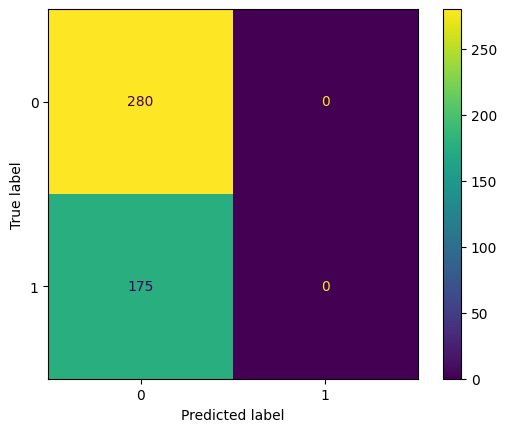

In [20]:
cm = confusion_matrix(y_train, y_train_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()

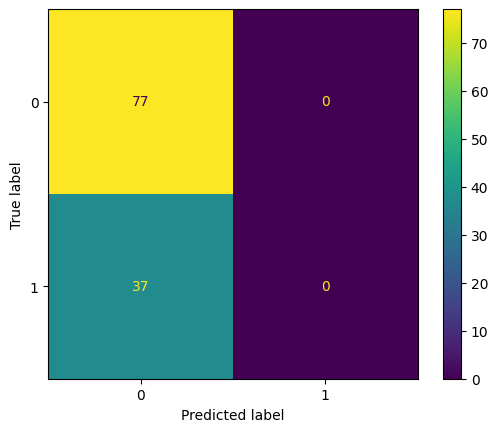

In [21]:
cm = confusion_matrix(y_test, y_test_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()

In [41]:
# Creamos un modelo con 100 neuronas en la capa oculta
#mlpc = MLPClassifier(solver='sgd', random_state=2006, hidden_layer_sizes=[1000],  activation='relu')
mlpc = MLPClassifier(random_state=2006)

In [42]:
# Ajustamos nuestro clasificador a partir de los datos de entrenamiento
mlpc.fit(X_train, y_train)

MLPClassifier(random_state=2006)

In [43]:
# 6.3. Prediccion del modelo
y_train_pred = mlpc.predict(X_train)
y_test_pred = mlpc.predict(X_test)

# 7. Obtenemos la puntuación del modelo
print('Training score: {:.3f}'.format(mlpc.score(X_train, y_train)))
print('Test score: {:.3f}'.format(mlpc.score(X_test, y_test)))

Training score: 0.952
Test score: 0.939


In [44]:
results = {}
results['train'] = eval_model(y_train, y_train_pred)
results['test'] = eval_model(y_test, y_test_pred)
pd.DataFrame(results)

,train,test
ACC,0.951648,0.938596
PRE,0.902413,0.845247
SEN,0.937143,0.945946
F1,0.937143,0.909091
AuC,0.948929,0.940505


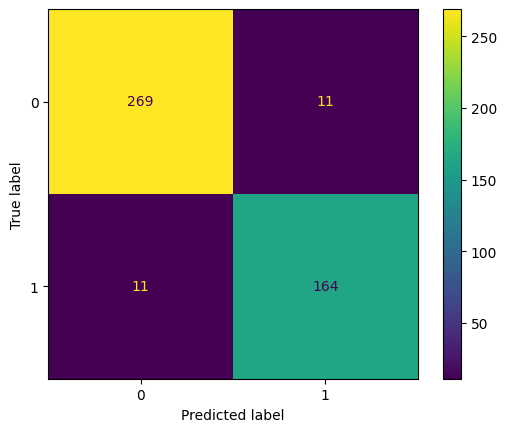

In [45]:
cm = confusion_matrix(y_train, y_train_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()

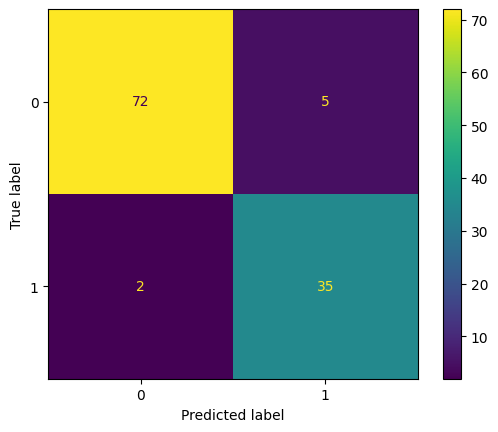

In [46]:
cm = confusion_matrix(y_test, y_test_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'hidden_layer_sizes':[1, 5, 10, 30, 50, 70, 90, 100, 150]}

grid = GridSearchCV(
        estimator = MLPClassifier(
                        solver = 'sgd',
                        random_state = 2006
                    ),

        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 5,
        refit      = True,
        return_train_score = True
      )

_ = grid.fit(X_train, y_train)

scores = pd.DataFrame(grid.cv_results_)

/home/belphegor/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/belphegor/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/belphegor/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/belphegor/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/belphegor/.local/lib/python3.1

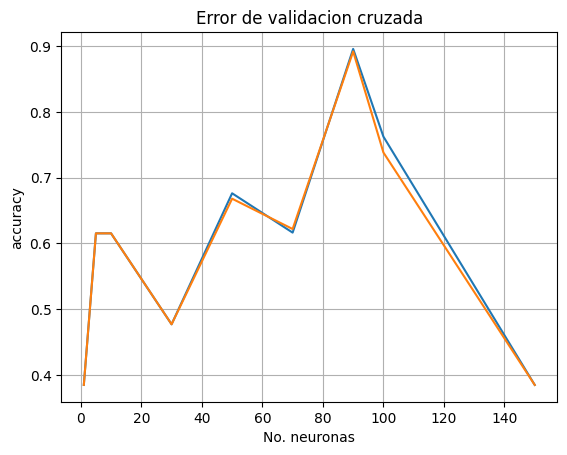

In [73]:
plt.figure()
plt.plot(scores['param_hidden_layer_sizes'], scores['mean_train_score'])
plt.plot(scores['param_hidden_layer_sizes'], scores['mean_test_score'])
plt.ylabel('accuracy')
plt.xlabel('No. neuronas')
plt.grid('on')
plt.title('Error de validacion cruzada')
plt.show()